# **IMPORTS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.fftpack import fft, fftfreq
import sys
sys.path.append("../")
from src.baseline_utils import *

# **EDA**

In [3]:
df = pd.read_csv("../datasets/esr_dataset.csv")
df = df.drop("Unnamed", axis=1)
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5


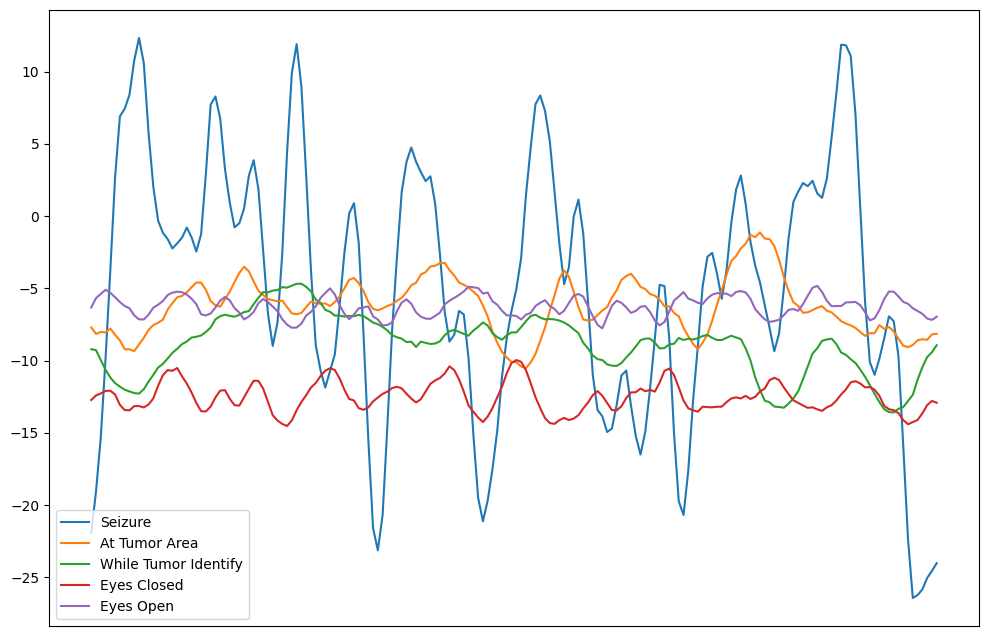

In [4]:
# Усредним значения по каждому классу и отобразим графически
n_classes = len(df['y'].unique())
classes = {1 : "Seizure", 2 : "At Tumor Area", 3 : "While Tumor Identify", 4: "Eyes Closed", 5 : "Eyes Open" }
plt.figure(figsize=(12, 8))
for n in range(n_classes):
  mean = df[df['y'] == n+1].drop('y', axis=1).mean()
  plt.plot(mean, label = classes[n+1])
plt.xticks([], [])
plt.legend()
plt.show()

Из изображения выше видно, что при эпилепсии частоты волн на ЭЭГ в среднем выше, чем в других состояниях

In [5]:
# Трансформируем целевую переменную из многоклассовой в бинарную
df['y'] = df['y'].apply(lambda y: 1 if y==1 else 0)
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [6]:
# Делим выборку на тренировочную и тестовую
X_train = df.drop('y', axis = 1)
Y_train = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# **BASELINE**

Проверим 3 модели для классификации: RandomForest, Support Vector Machine, KNN

In [7]:
train_model(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.95      0.94      0.95       465

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [8]:
train_model(SVC(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.97      0.92      0.95       465

    accuracy                           0.98      2300
   macro avg       0.98      0.96      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [9]:
train_model(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1835
           1       1.00      0.63      0.77       465

    accuracy                           0.92      2300
   macro avg       0.96      0.81      0.86      2300
weighted avg       0.93      0.92      0.92      2300



# **FFT Feature Exctraction & ML**

In [10]:
N = 178 # Количество частей в сигнале
T = 1/N # Период сигнала

Пример результата быстрого преобразования Фурье на одном сигнале

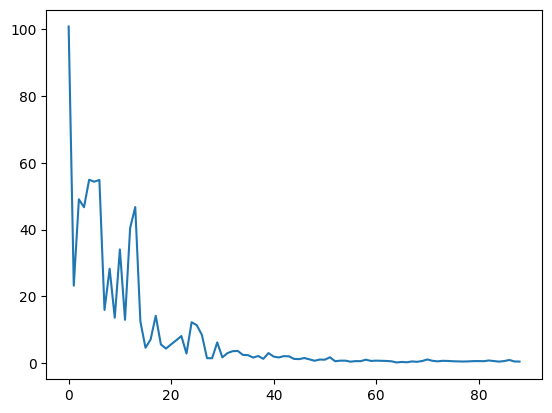

In [11]:
# Генерация списка координат для каждой части сигнала (нужно для визуализации)
xf = fftfreq(N, T)[0:N//2]
sample_signal = X_train.iloc[0].to_numpy()
fft_output = transform_signal_with_fft(sample_signal, N)
plt.plot(xf, fft_output)
plt.show()

In [12]:
X_train_fft = transfrom_dataset_with_fft(X_train, N)
X_test_fft = transfrom_dataset_with_fft(X_test, N)

In [13]:
train_model(RandomForestClassifier(), X_train_fft, Y_train, X_test_fft, Y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.96      0.96      0.96       465

    accuracy                           0.98      2300
   macro avg       0.97      0.98      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [14]:
train_model(SVC(), X_train_fft, Y_train, X_test_fft, Y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1835
           1       0.98      0.96      0.97       465

    accuracy                           0.99      2300
   macro avg       0.99      0.98      0.98      2300
weighted avg       0.99      0.99      0.99      2300



In [15]:
train_model(KNeighborsClassifier(), X_train_fft, Y_train, X_test_fft, Y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.97      0.91      0.94       465

    accuracy                           0.98      2300
   macro avg       0.97      0.95      0.96      2300
weighted avg       0.98      0.98      0.98      2300



Точность классификации повысилась. Наиболее существенно: kNN, SVM